# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [25]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Cargamos los datos de entrada del archivo csv

In [26]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")

clases = {
    0: 'Windows',
    1: 'Linux',
    2: 'Mac'
}

dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [27]:
dataframe['clase'].value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

In [28]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [30]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

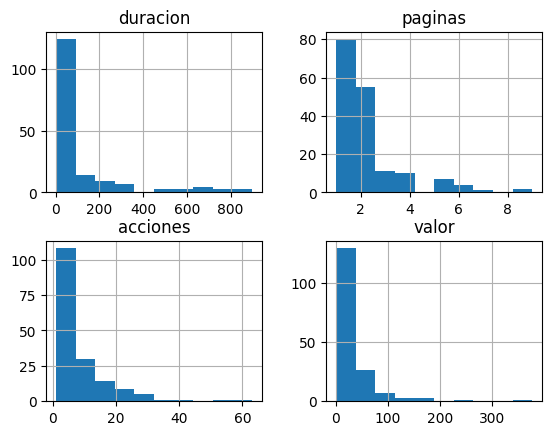

In [31]:
dataframe.drop(['clase'], 1).hist()
plt.show()

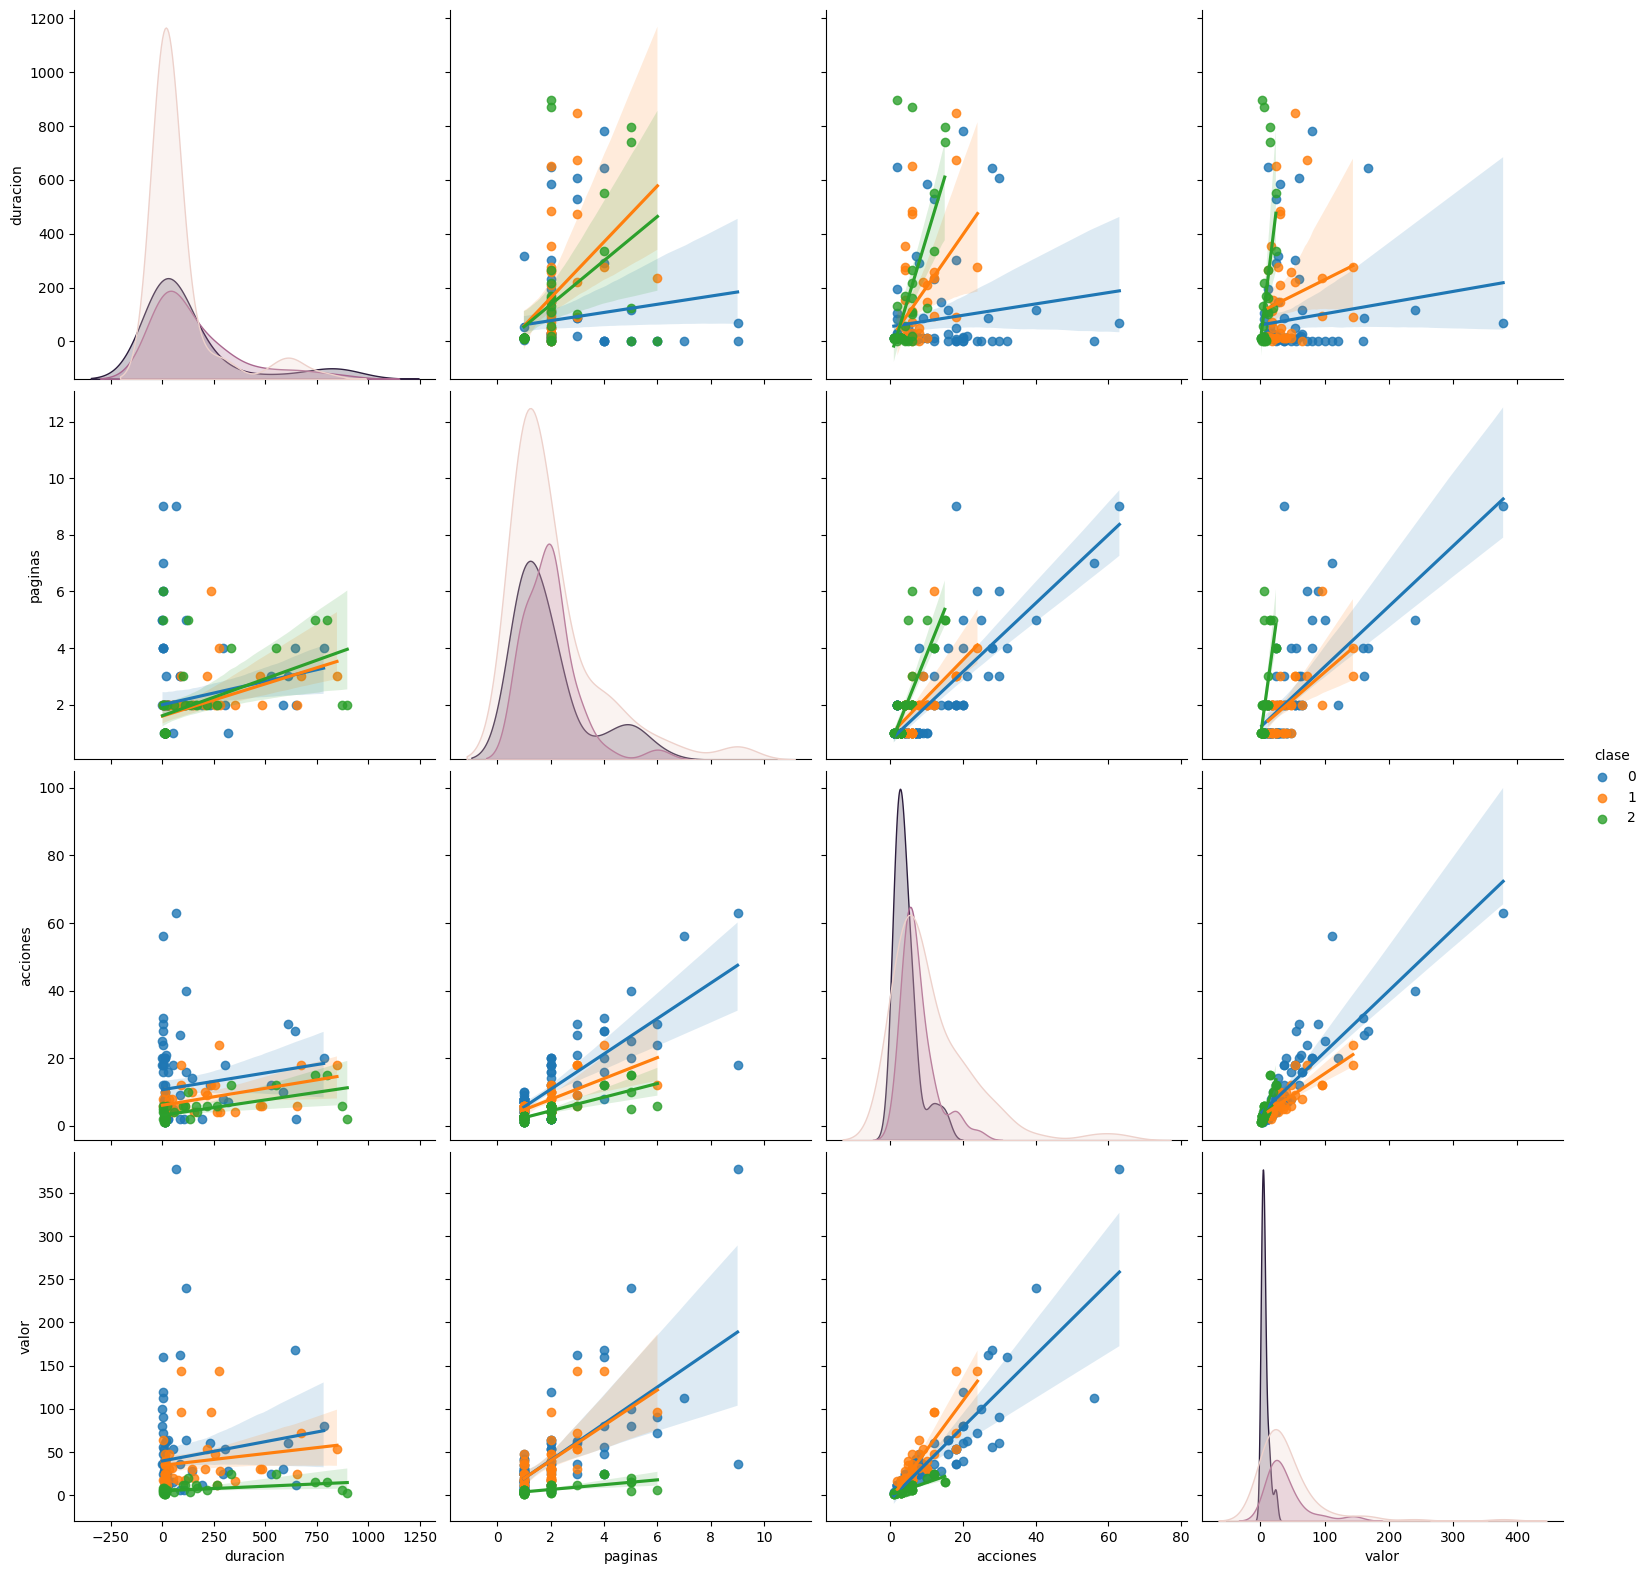

In [32]:
sns.pairplot(dataframe.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

## Creamos el modelo

In [33]:
X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [36]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 1
 0 1 1 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
predicions_proba = model.predict_proba(X) # Muestra las probabilidades de cada opción
print(np.round(np.array(predicions_proba), 2))

[[0.24 0.08 0.68]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.14 0.04 0.82]
 [0.35 0.11 0.54]
 [0.14 0.02 0.84]
 [0.02 0.02 0.96]
 [0.26 0.1  0.64]
 [0.07 0.04 0.88]
 [0.   0.   1.  ]
 [0.13 0.07 0.8 ]
 [0.3  0.06 0.64]
 [0.06 0.03 0.91]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.25 0.08 0.67]
 [0.   0.   1.  ]
 [0.7  0.3  0.  ]
 [0.59 0.41 0.  ]
 [0.75 0.25 0.  ]
 [0.74 0.26 0.  ]
 [0.3  0.7  0.  ]
 [0.82 0.18 0.  ]
 [0.49 0.51 0.  ]
 [0.78 0.22 0.  ]
 [0.41 0.59 0.  ]
 [0.15 0.85 0.  ]
 [0.71 0.29 0.  ]
 [0.47 0.51 0.02]
 [0.5  0.5  0.  ]
 [0.35 0.65 0.  ]
 [0.24 0.76 0.  ]
 [0.25 0.75 0.  ]
 [0.19 0.81 0.  ]
 [0.58 0.42 0.  ]
 [0.   0.   1.  ]
 [0.03 0.02 0.96]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.82 0.18 0.  ]
 [0.64 0.36 0.  ]
 [0.58 0.42 0.  ]
 [0.22 0.78 0.  ]
 [0.71 0.29 0.  ]
 [0.28 0.72 0.  ]
 [0.52 0.48 0.  ]
 [0.43 0.57 0.  ]
 [0.79 0.21 0.  ]
 [0.99 0.01 0.  ]
 [0.73 0.27 0.  ]
 [0.77 0.23 0.  ]
 [0.97 0.03 0.  ]
 [0.99 0.01 0.  ]
 [0.92 0.08 0.  ]
 [0.98 0.0

In [38]:
model.score(X, y) # Es el acurasy

0.7823529411764706

In [39]:
model.classes_

array([0, 1, 2])

# Adicional: Validación del Modelo

In [40]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [41]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') # Me da el accuracy de cada split de 10, No reentrena el modelo, sino que cada vez que obtiene el accuracy es un nuevo modelo

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # Sirve para obtener una métrica más exacta
print(cv_results)
print(msg)

[0.78571429 0.64285714 0.71428571 0.71428571 0.71428571 0.71428571
 0.84615385 0.92307692 0.61538462 0.61538462]
Logistic Regression: 0.728571 (0.094186)


In [42]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [43]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8235294117647058


In [44]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 82.35 %
Error: 17.65 %


## Reporte de Resultados

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [47]:
c_matrix = confusion_matrix(Y_test, predictions)

In [48]:
print(c_matrix)

[[16  0  2]
 [ 4  2  0]
 [ 0  0 10]]


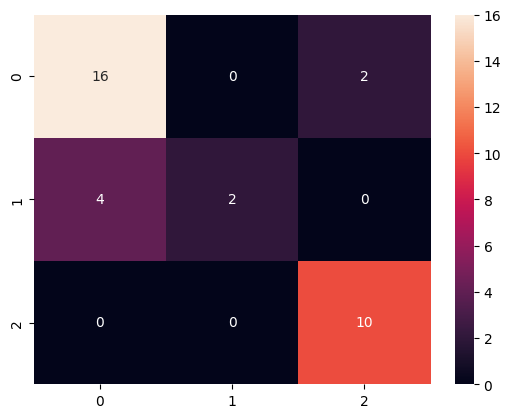

In [49]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

In [50]:
29/34

0.8529411764705882

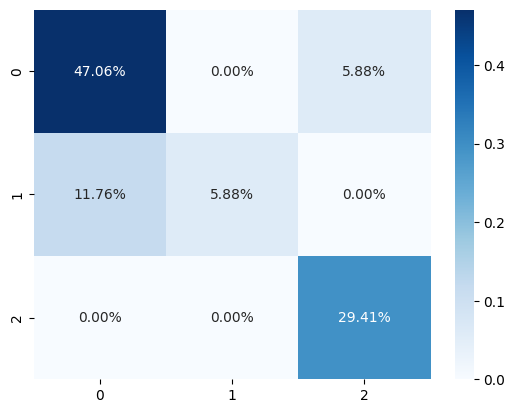

In [51]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

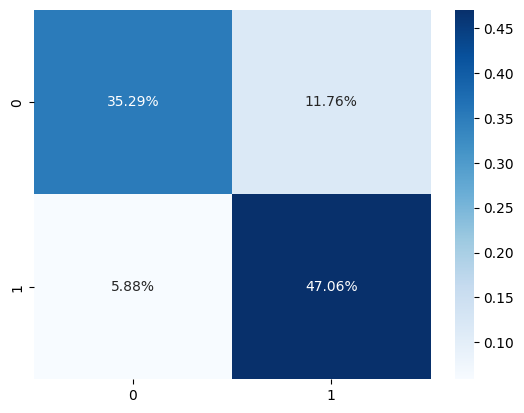

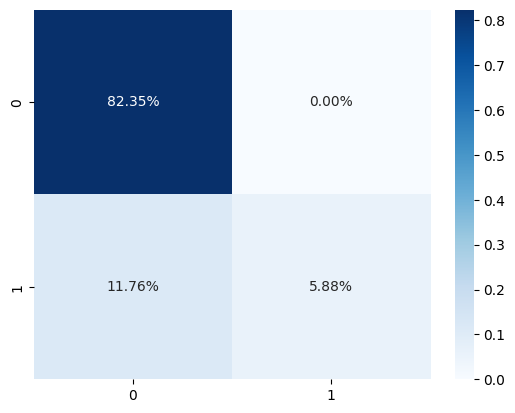

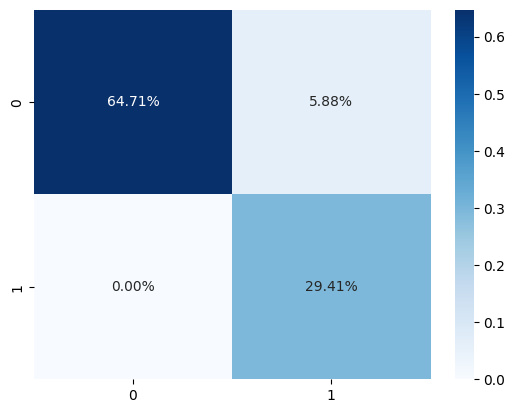

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score
for i in multilabel_confusion_matrix(Y_test, predictions):
    sns.heatmap(i/np.sum(i), annot=True, 
            fmt='.2%', cmap='Blues')
    plt.show()

[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

# Clasificación de nuevos registros

In [56]:
X_new = pd.DataFrame({'duracion': [8],
                     'paginas': [5],
                     'acciones': [5],
                     'valor': [2]})
model.predict(X_new)

array([2])